In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

In [ ]:
df=pd.read_csv('/content/sample_data/advertising.csv')

In [ ]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
import plotly.graph_objects as go

# Create a subplot for box plots
fig = go.Figure()

# Add box plots for each feature
fig.add_trace(go.Box(y=df['TV'], name='TV', boxmean=True, marker_color='blue'))
fig.add_trace(go.Box(y=df['Newspaper'], name='Newspaper', boxmean=True, marker_color='green'))
fig.add_trace(go.Box(y=df['Radio'], name='Radio', boxmean=True, marker_color='orange'))

# Customize the layout
fig.update_layout(
    title="Outlier Analysis for Advertising Channels",
    yaxis_title="Values",
    xaxis_title="Channels",
    template="plotly_dark",
    boxmode="group",
    width=700,
    height=500
)

# Show the plot
fig.show()


In [ ]:
# There are no considerable outliers present in the data.

In [ ]:
# EDA


In [ ]:
# 1. Univariate Analysis
# Focuses on analyzing individual variables to understand their distribution and characteristics.

# Sales(Target variable)

In [ ]:
# Box plot for Sales
fig = px.box(df, y='Sales',
             title="Outlier Analysis of Sales",
             labels={'Sales': 'Sales'},
             template="plotly_dark",
             width=600, height=400)

fig.update_traces(marker_color='cyan')  # Add a custom color
fig.show()

In [ ]:
# Melt the dataset for Plotly compatibility
melted_df = df.melt(id_vars='Sales', value_vars=['TV', 'Newspaper', 'Radio'],
                    var_name='Variable', value_name='Value')

# Create a scatter plot
fig = px.scatter(melted_df, x='Value', y='Sales',
                 facet_col='Variable',
                 title="Sales Relationship with TV, Newspaper, and Radio",
                 labels={'Value': 'Advertising Spend', 'Sales': 'Sales'},
                 color='Variable',
                 height=500, width=900)

fig.update_traces(marker=dict(size=6, opacity=0.7))
fig.show()

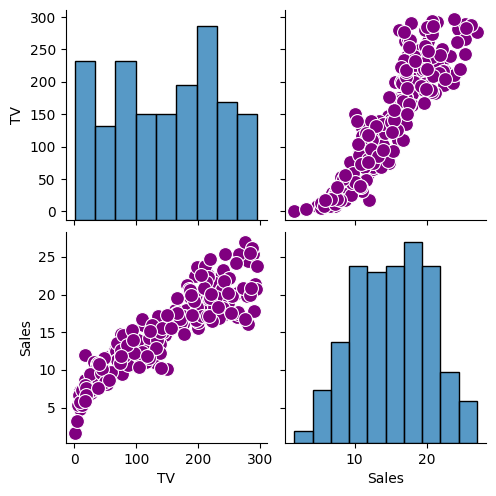

In [ ]:
# Pairplot with custom color and size
sns.pairplot(data=df[['TV', 'Sales']],
             plot_kws={'s': 100, 'color': 'purple'})

Text(0.5, 1.0, 'Correlation Heatmap')

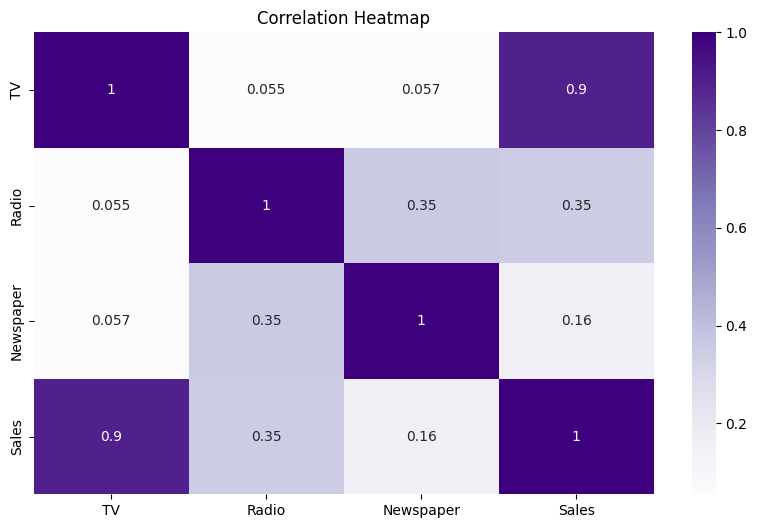

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Purples')
plt.title('Correlation Heatmap')

In [ ]:
# As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Import required libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales.
# So let's go ahead and perform simple linear regression using TV as our feature variable.

# Define X and y
X = df[['TV']]  # Features (TV advertising spend)
y = df['Sales'] # Target (Sales)


# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])


[[ 1.53003874]
 [ 0.34103865]
 [-0.5202089 ]
 [-1.58600275]
 [ 1.60659408]]


In [ ]:
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)
print(X_train_normalized[:5])


[[0.95908015]
 [0.62292864]
 [0.37943862]
 [0.07811972]
 [0.98072371]]


In [ ]:
# Model Building

In [ ]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)  # Use scaled data for training

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")


Mean Absolute Error: 1.806912377664152
R2 Score: 0.814855389208679
MSE: 5.179525402166653
RMSE: 2.2758570698017597
MAE: 1.806912377664152


In [ ]:
ensemble=RandomForestRegressor()
ensemble.fit(X_train_scaled,y_train)
y_pred=ensemble.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")

Mean Absolute Error: 1.9706622222222212
R2 Score: 0.7993371195380412
MSE: 5.61365778988889
RMSE: 2.3693158906926888
MAE: 1.9706622222222212


In [ ]:
svm=SVR()
svm.fit(X_train_scaled,y_train)
y_pred=svm.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")

Mean Absolute Error: 1.953234627808456
R2 Score: 0.7988900348317949
MSE: 5.626165237894131
RMSE: 2.3719538861230274
MAE: 1.953234627808456


In [ ]:
tree=DecisionTreeRegressor()
tree.fit(X_train_scaled,y_train)
y_pred=tree.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")

Mean Absolute Error: 2.1424999999999996
R2 Score: 0.7541470711942684
MSE: 6.8778749999999995
RMSE: 2.6225703041100727
MAE: 2.1424999999999996


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor()
}

# Train models and collect metrics
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store evaluation metrics
    metrics.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    })

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot comparison
fig = px.bar(metrics_df, x='Model', y=['MAE', 'MSE', 'RMSE', 'R2'], barmode='group', title="Model Comparison")
fig.show()
